## Krishna Sah Teli
### email: sah.krishna1999@gmail.com

### Question 1: On a dataset of your choice perform Exploratory Data Anlaysis and drive insights using statistics & visualizations.

In [ ]:
### Use Pandas to load the dataset
### Use Seaborn to perform visualization

In [ ]:
import pandas as pd
import seaborn as sns

Reading dataframe

In [ ]:
data= pd.read_csv("all_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

Clean Up the data

In [ ]:
# Find NAN
nan_df = data[data.isna().any(axis=1)]
display(nan_df.head())

data = data.dropna(how='all')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Get rid of text in order date column

In [ ]:
data = data[data['Order Date'].str[0:2]!='Or']


Making columns in correct type

In [ ]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

Augment data with aditional columns

Add month column

In [ ]:
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Add City column

In [ ]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [ ]:
data["City"].unique()

array(['Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)',
       'San Francisco  (CA)', 'Seattle  (WA)', 'Atlanta  (GA)',
       'New York City  (NY)', 'Portland  (OR)', 'Austin  (TX)',
       'Portland  (ME)'], dtype=object)

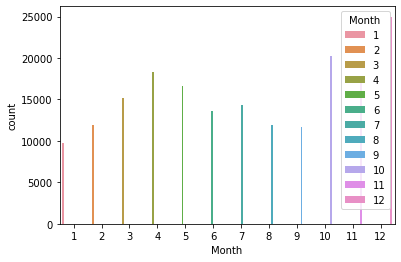

In [ ]:
# shows in which month has more number of selling?
sns.countplot(x= "Month", data= data, hue= "Month")

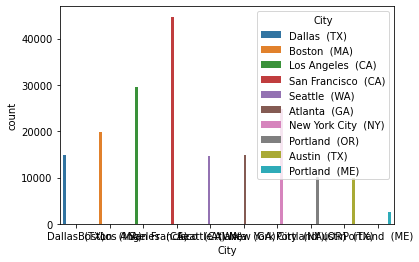

In [ ]:
# which product more likely gets sold?
sns.countplot(x= "City", data= data, hue= "City")

Q. what was the best month for sales? How much was earned in that month?

In [ ]:
data['Sales'] = data['Quantity Ordered'].astype('int') * data['Price Each'].astype('float')


In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [ ]:
data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [ ]:
temp= data.groupby(['Month'])

In [ ]:
temp.Sales

range(1, 13)


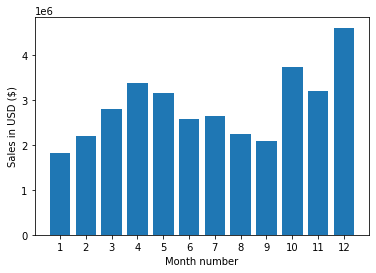

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

Q. What city sold the most product?

In [ ]:
data.groupby(['City']).sum()

,Month,Month 2,Sales
City,,,
Atlanta (GA),104794,104794,2.795499e+06
Austin (TX),69829,69829,1.819582e+06
Boston (MA),141112,141112,3.661642e+06
Dallas (TX),104620,104620,2.767975e+06
Los Angeles (CA),208325,208325,5.452571e+06
New York City (NY),175741,175741,4.664317e+06
Portland (ME),17144,17144,4.497583e+05
Portland (OR),70621,70621,1.870732e+06
San Francisco (CA),315520,315520,8.262204e+06


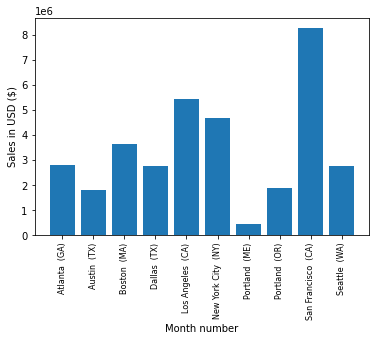

In [ ]:
keys = [city for city, df in data.groupby(['City'])]

plt.bar(keys,data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

Q. What time should we display advertisement to maximize likelihood of customer's buying product?

In [ ]:
# Add hour column
data['Hour'] = pd.to_datetime(data['Order Date']).dt.hour
data['Minute'] = pd.to_datetime(data['Order Date']).dt.minute
data['Count'] = 1
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


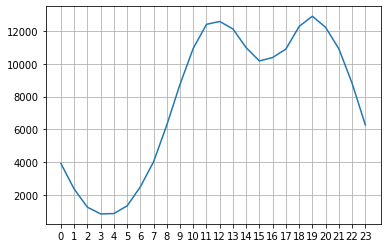

In [ ]:
keys = [pair for pair, df in data.groupby(['Hour'])]

plt.plot(keys, data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

My recommendation is slightly before 1am or 7pm

Q. What products are most oftern sold together?


In [ ]:
df = data[data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Q. What product sold the most? Why do you thnk it sold the most?

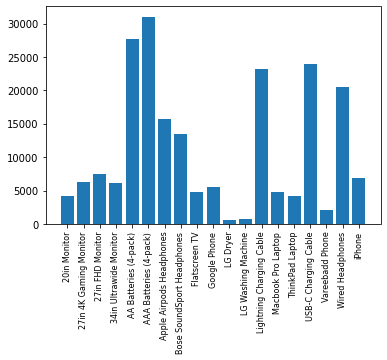

In [ ]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

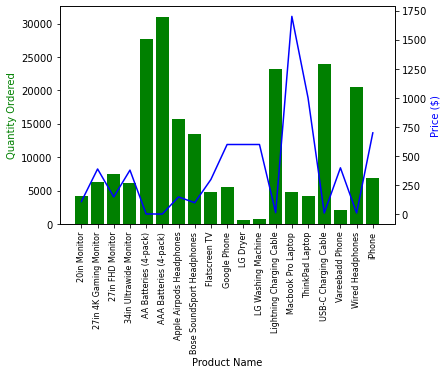

In [ ]:
prices = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

### Question 2: Perform classification using KNN and create a plot to show Value of K vs Accuracy for 50 values of K.

Loading Data

In [ ]:
df= pd.read_csv("bank_kaggle.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


finding nan value

In [ ]:
df.shape

(11162, 17)

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

It shows the dataset does not contain any null value row

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


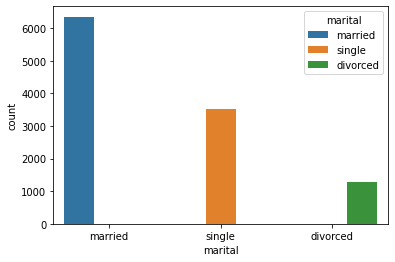

In [ ]:
sns.countplot(x="marital", data=df, hue="marital")

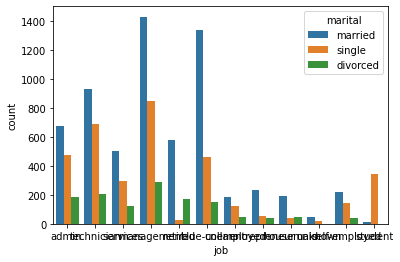

In [ ]:
sns.countplot(x="job", data=df, hue="marital")

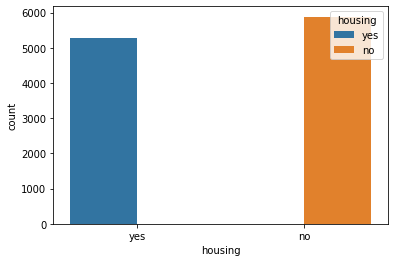

In [ ]:
sns.countplot(x="housing", data=df, hue="housing")

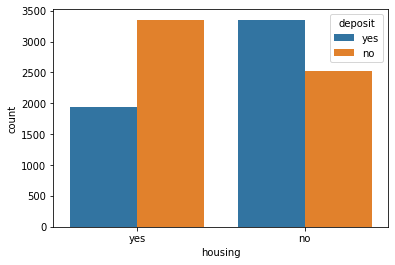

In [ ]:
sns.countplot(x="housing", data=df, hue="deposit")

Encoding the non-numeric data into numeric data

In [ ]:
from sklearn import preprocessing

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data_knn= df.drop(columns=["default","contact","poutcome"], axis=1)

In [ ]:
le= preprocessing.LabelEncoder()
data_knn["job"]= le.fit_transform(data_knn["job"])
data_knn["marital"]= le.fit_transform(data_knn["marital"])
data_knn["education"]= le.fit_transform(data_knn["education"])
data_knn["housing"]= le.fit_transform(data_knn["housing"])
data_knn["loan"]= le.fit_transform(data_knn["loan"])
data_knn["month"]= le.fit_transform(data_knn["month"])
data_knn["pdays"]= le.fit_transform(data_knn["pdays"])
data_knn["deposit"]= le.fit_transform(data_knn["deposit"])

In [ ]:
data_knn.shape

(11162, 14)

In [ ]:
data_knn["deposit"].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64>

Selecting important variables

In [ ]:
X= data_knn.drop(columns="deposit", axis=1)
Y= data_knn[['deposit']]

Splitting data set into training and teting dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y)

Using KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model= KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict= model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_predict, Y_test)

0.7291293443210319

In [ ]:
k=[]
accuracy=[]

for i in range(1, 51):
  model= KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, Y_train)
  y=model.predict(X_test)
  k.append(i)
  accuracy.append(accuracy_score(y, Y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


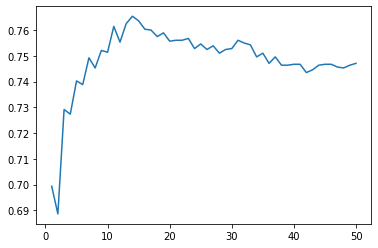

In [ ]:
sns.lineplot(k, accuracy)

### Question 3: Use PyCaret to perform series of following steps

In [ ]:
### Run this cell to install PyCaret
!pip install pycaret

#### Question 3-a: Setup a PyCaret experiment on the dataset of your choice.

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
from pycaret.classification import *

In [ ]:
exp= setup(data=df, target= "deposit")

,Description,Value
0,session_id,2677
1,Target,deposit
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(11162, 17)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8561,0.9269,0.8848,0.8227,0.8525,0.7125,0.7144,0.214
rf,Random Forest Classifier,0.8491,0.9180,0.8769,0.8161,0.8453,0.6984,0.7003,1.109
gbc,Gradient Boosting Classifier,0.8455,0.9200,0.8553,0.8232,0.8388,0.6906,0.6913,1.158
et,Extra Trees Classifier,0.8245,0.8981,0.8126,0.8142,0.8132,0.6478,0.6480,1.120
ada,Ada Boost Classifier,0.8225,0.9011,0.7908,0.8246,0.8071,0.6428,0.6436,0.390
lr,Logistic Regression,0.8204,0.8992,0.7902,0.8214,0.8052,0.6388,0.6395,1.411
ridge,Ridge Classifier,0.8159,0.0000,0.7497,0.8416,0.7928,0.6282,0.6318,0.035
lda,Linear Discriminant Analysis,0.8158,0.9011,0.7494,0.8416,0.7926,0.6280,0.6316,0.091
dt,Decision Tree Classifier,0.7827,0.7812,0.7567,0.7758,0.7660,0.5632,0.5636,0.083
knn,K Neighbors Classifier,0.7398,0.7976,0.7153,0.7271,0.7210,0.4773,0.4775,0.173


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2677, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
knn= create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8747,0.9362,0.9022,0.8426,0.8714,0.7495,0.7511
1,0.8581,0.9354,0.8965,0.8184,0.8557,0.7166,0.7195
2,0.8606,0.9296,0.9019,0.8193,0.8586,0.7218,0.7250
3,0.8592,0.9318,0.8747,0.8338,0.8537,0.7181,0.7188
4,0.8553,0.9221,0.8747,0.8273,0.8503,0.7105,0.7115
5,0.8464,0.9216,0.8692,0.8159,0.8417,0.6927,0.6940
6,0.8553,0.9311,0.8801,0.8240,0.8511,0.7107,0.7122
7,0.8630,0.9281,0.9046,0.8218,0.8612,0.7266,0.7298
8,0.8233,0.9036,0.8638,0.7827,0.8212,0.6474,0.6505
9,0.8656,0.9294,0.8801,0.8411,0.8602,0.7308,0.7315


In [ ]:
knn= create_model("knn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7494,0.8086,0.7310,0.7350,0.7330,0.4968,0.4968
1,0.7353,0.8032,0.7275,0.7139,0.7206,0.4692,0.4692
2,0.7545,0.8113,0.7193,0.7479,0.7333,0.5060,0.5063
3,0.7414,0.7985,0.7139,0.7298,0.7218,0.4802,0.4803
4,0.7055,0.7739,0.6894,0.6856,0.6875,0.4091,0.4091
5,0.7452,0.8037,0.7275,0.7295,0.7285,0.4885,0.4885
6,0.7618,0.8153,0.7193,0.7608,0.7395,0.5205,0.5212
7,0.7362,0.7865,0.7030,0.7268,0.7147,0.4696,0.4698
8,0.7222,0.7754,0.7166,0.6995,0.7079,0.4431,0.4432
9,0.7465,0.7993,0.7057,0.7421,0.7235,0.4897,0.4902


#### Question 3-b: Check for data imbalance and solve it using PyCaret

In [ ]:
import seaborn as sns

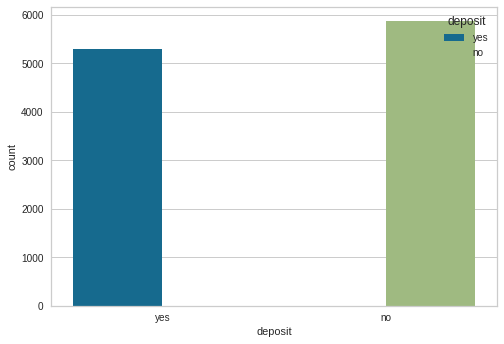

In [ ]:
sns.countplot(x= "deposit", data= df, hue="deposit")

In [ ]:
lightgbm= create_model("lightgbm")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8747,0.9362,0.9022,0.8426,0.8714,0.7495,0.7511
1,0.8581,0.9354,0.8965,0.8184,0.8557,0.7166,0.7195
2,0.8606,0.9296,0.9019,0.8193,0.8586,0.7218,0.7250
3,0.8592,0.9318,0.8747,0.8338,0.8537,0.7181,0.7188
4,0.8553,0.9221,0.8747,0.8273,0.8503,0.7105,0.7115
5,0.8464,0.9216,0.8692,0.8159,0.8417,0.6927,0.6940
6,0.8553,0.9311,0.8801,0.8240,0.8511,0.7107,0.7122
7,0.8630,0.9281,0.9046,0.8218,0.8612,0.7266,0.7298
8,0.8233,0.9036,0.8638,0.7827,0.8212,0.6474,0.6505
9,0.8656,0.9294,0.8801,0.8411,0.8602,0.7308,0.7315


In [ ]:
tunned_lgbm= tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8734,0.9321,0.8940,0.8458,0.8692,0.7467,0.7478
1,0.8465,0.9303,0.8692,0.8159,0.8417,0.6931,0.6944
2,0.8529,0.9263,0.8719,0.8247,0.8477,0.7057,0.7068
3,0.8502,0.9239,0.8556,0.8307,0.8430,0.6998,0.7001
4,0.8489,0.9162,0.8692,0.8201,0.8439,0.6978,0.6989
5,0.8438,0.9178,0.8665,0.8133,0.8391,0.6876,0.6889
6,0.8643,0.9252,0.8965,0.8287,0.8613,0.7288,0.7310
7,0.8464,0.9212,0.8692,0.8159,0.8417,0.6927,0.6940
8,0.8271,0.8995,0.8747,0.7829,0.8263,0.6553,0.6593
9,0.8668,0.9311,0.8747,0.8470,0.8606,0.7332,0.7335


As the number of both yes and no label dataset are enoughj and there is no difference in the mean accuracy for both initially allocated hyperparameters dataset and tunned hyperparemeters datset. Thus it does not suffered from imbalance issue.

```
`# This is formatted as code`
```



If the dataset suffers from imbalance issue then we can follow following methodlogy to mitigate it.

exp= setup(data= df, target= "deposit, fix_imbalance= True)

compare_models()



#### Question 3-c: Compare all the ML models according to F-1 Score

In [ ]:
comp= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8561,0.9269,0.8848,0.8227,0.8525,0.7125,0.7144,0.184
rf,Random Forest Classifier,0.8491,0.9180,0.8769,0.8161,0.8453,0.6984,0.7003,1.102
gbc,Gradient Boosting Classifier,0.8455,0.9200,0.8553,0.8232,0.8388,0.6906,0.6913,1.174
et,Extra Trees Classifier,0.8245,0.8981,0.8126,0.8142,0.8132,0.6478,0.6480,1.105
ada,Ada Boost Classifier,0.8225,0.9011,0.7908,0.8246,0.8071,0.6428,0.6436,0.399
lr,Logistic Regression,0.8204,0.8992,0.7902,0.8214,0.8052,0.6388,0.6395,1.101
ridge,Ridge Classifier,0.8159,0.0000,0.7497,0.8416,0.7928,0.6282,0.6318,0.037
lda,Linear Discriminant Analysis,0.8158,0.9011,0.7494,0.8416,0.7926,0.6280,0.6316,0.089
dt,Decision Tree Classifier,0.7827,0.7812,0.7567,0.7758,0.7660,0.5632,0.5636,0.085
knn,K Neighbors Classifier,0.7398,0.7976,0.7153,0.7271,0.7210,0.4773,0.4775,0.173


On the basis of F1 score, Light Gradient Boosting machine shows better perfomance while Quadratic Discriminant analysis shows poor performance

#### Question 3-d: Select the model which performs the best according to F-1 Score.

In [ ]:
#On the basis of F1 score, light gradient boosting machine shows beter performance

#### Question 3-e: Perform the hyperparameter tuning of the model

In [ ]:
lightgbm= create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8747,0.9362,0.9022,0.8426,0.8714,0.7495,0.7511
1,0.8581,0.9354,0.8965,0.8184,0.8557,0.7166,0.7195
2,0.8606,0.9296,0.9019,0.8193,0.8586,0.7218,0.7250
3,0.8592,0.9318,0.8747,0.8338,0.8537,0.7181,0.7188
4,0.8553,0.9221,0.8747,0.8273,0.8503,0.7105,0.7115
5,0.8464,0.9216,0.8692,0.8159,0.8417,0.6927,0.6940
6,0.8553,0.9311,0.8801,0.8240,0.8511,0.7107,0.7122
7,0.8630,0.9281,0.9046,0.8218,0.8612,0.7266,0.7298
8,0.8233,0.9036,0.8638,0.7827,0.8212,0.6474,0.6505
9,0.8656,0.9294,0.8801,0.8411,0.8602,0.7308,0.7315


In [ ]:
tunned_lgbm= tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8734,0.9321,0.8940,0.8458,0.8692,0.7467,0.7478
1,0.8465,0.9303,0.8692,0.8159,0.8417,0.6931,0.6944
2,0.8529,0.9263,0.8719,0.8247,0.8477,0.7057,0.7068
3,0.8502,0.9239,0.8556,0.8307,0.8430,0.6998,0.7001
4,0.8489,0.9162,0.8692,0.8201,0.8439,0.6978,0.6989
5,0.8438,0.9178,0.8665,0.8133,0.8391,0.6876,0.6889
6,0.8643,0.9252,0.8965,0.8287,0.8613,0.7288,0.7310
7,0.8464,0.9212,0.8692,0.8159,0.8417,0.6927,0.6940
8,0.8271,0.8995,0.8747,0.7829,0.8263,0.6553,0.6593
9,0.8668,0.9311,0.8747,0.8470,0.8606,0.7332,0.7335


#### Question 3-f: Compare the and note down the changes which you noticed before and after hyperparameter tuning of the model.

In [ ]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2677, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
print(tunned_lgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=280, n_jobs=-1, num_leaves=10, objective=None,
               random_state=2677, reg_alpha=3, reg_lambda=0.0001, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
